In [1]:
import pandas as pd
from random import choice
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import get_named_colors_mapping
import matplotlib.animation as animation
from IPython.display import HTML
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
data=pd.read_csv(url)

In [4]:
#data = pd.read_csv("./inputs/owid-covid-data.csv")

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60701 entries, 0 to 60700
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               60355 non-null  object 
 1   continent                              59993 non-null  object 
 2   location                               60701 non-null  object 
 3   date                                   60701 non-null  object 
 4   total_cases                            60109 non-null  float64
 5   new_cases                              60102 non-null  float64
 6   new_cases_smoothed                     59147 non-null  float64
 7   total_deaths                           51646 non-null  float64
 8   new_deaths                             51645 non-null  float64
 9   new_deaths_smoothed                    59147 non-null  float64
 10  total_cases_per_million                59763 non-null  float64
 11  ne

In [7]:
data2 = data[["location","date","total_cases"]]

In [8]:
data2[["date"]]= data2[["date"]].apply(pd.to_datetime)

In [9]:
data2.info(),data2.date.min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60701 entries, 0 to 60700
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     60701 non-null  object        
 1   date         60701 non-null  datetime64[ns]
 2   total_cases  60109 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ MB


(None, Timestamp('2020-01-01 00:00:00'))

In [10]:
data2["days"] = ((data2["date"]-data2.date.min()).astype(int)/10e8)/86400

In [11]:
data2.head()

,location,date,total_cases,days
0,Afghanistan,2020-02-24,1.0,54.0
1,Afghanistan,2020-02-25,1.0,55.0
2,Afghanistan,2020-02-26,1.0,56.0
3,Afghanistan,2020-02-27,1.0,57.0
4,Afghanistan,2020-02-28,1.0,58.0


In [12]:
data2.days.max()

383.0

In [13]:
data2.dtypes

location               object
date           datetime64[ns]
total_cases           float64
days                  float64
dtype: object

In [14]:
data2["day"] = data2['date'].map(lambda x: x.day)
data2["month"] = data2['date'].map(lambda x: x.month)
data2["year"] = data2['date'].map(lambda x: x.year)
data2.head()

,location,date,total_cases,days,day,month,year
0,Afghanistan,2020-02-24,1.0,54.0,24,2,2020
1,Afghanistan,2020-02-25,1.0,55.0,25,2,2020
2,Afghanistan,2020-02-26,1.0,56.0,26,2,2020
3,Afghanistan,2020-02-27,1.0,57.0,27,2,2020
4,Afghanistan,2020-02-28,1.0,58.0,28,2,2020


In [15]:
data2= data2.drop(columns=["date","year"], index=1)

In [16]:
data2.head()

,location,total_cases,days,day,month
0,Afghanistan,1.0,54.0,24,2
2,Afghanistan,1.0,56.0,26,2
3,Afghanistan,1.0,57.0,27,2
4,Afghanistan,1.0,58.0,28,2
5,Afghanistan,1.0,59.0,29,2


In [17]:
#data2.set_index("location")
#data2.head()
data2 = data2.groupby(["location", "days"], as_index= False).sum()

In [18]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60695,Zimbabwe,378.0,24256.0,13,1
60696,Zimbabwe,379.0,25368.0,14,1
60697,Zimbabwe,380.0,26109.0,15,1
60698,Zimbabwe,381.0,26881.0,16,1


In [19]:
data2.columns

Index(['location', 'days', 'total_cases', 'day', 'month'], dtype='object')

In [20]:
data2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            60690, 60691, 60692, 60693, 60694, 60695, 60696, 60697, 60698,
            60699],
           dtype='int64', length=60700)

In [21]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60695,Zimbabwe,378.0,24256.0,13,1
60696,Zimbabwe,379.0,25368.0,14,1
60697,Zimbabwe,380.0,26109.0,15,1
60698,Zimbabwe,381.0,26881.0,16,1


In [22]:
data2 = data2[~data2["location"].str.contains("World")]
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60695,Zimbabwe,378.0,24256.0,13,1
60696,Zimbabwe,379.0,25368.0,14,1
60697,Zimbabwe,380.0,26109.0,15,1
60698,Zimbabwe,381.0,26881.0,16,1


In [23]:
data2.days.max()

383.0

,location,days,total_cases,day,month
35343,Mexico,150.0,87512.0,30,5
9780,Canada,150.0,91681.0,30,5
11028,Chile,150.0,118720.0,30,5
25594,Iran,150.0,148950.0,30,5
42692,Peru,150.0,155671.0,30,5
55839,Turkey,150.0,163103.0,30,5
24592,India,150.0,181827.0,30,5
20691,Germany,150.0,183189.0,30,5
19390,France,150.0,190744.0,30,5
26959,Italy,150.0,232664.0,30,5


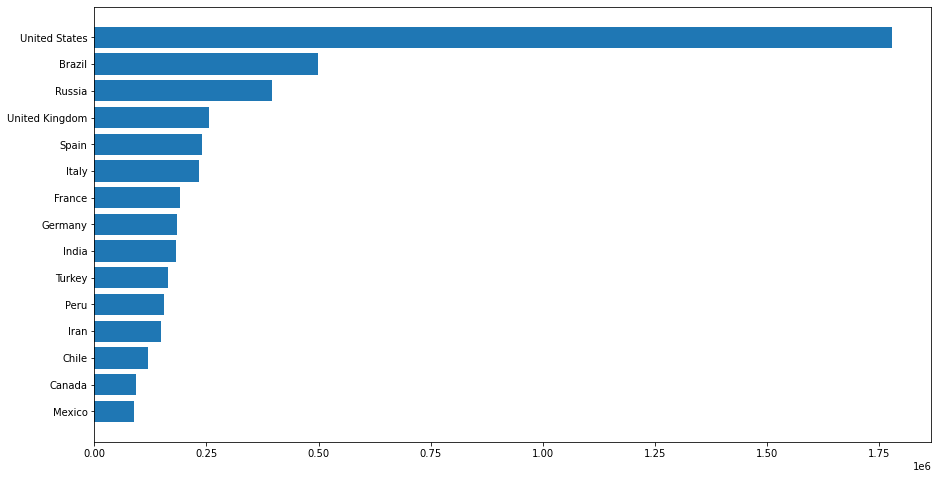

In [24]:
current_days=150
dff=(data2[data2.days.eq(current_days)].sort_values(by='total_cases', ascending=True).tail(15))
#dff[dff.location=="World"]


display(dff)

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.location, dff.total_cases);

In [25]:
countries = list(set(data2.location.tolist()))
values = get_named_colors_mapping().values()

values_list = list(values)

Text(1, 0.4, 'May')

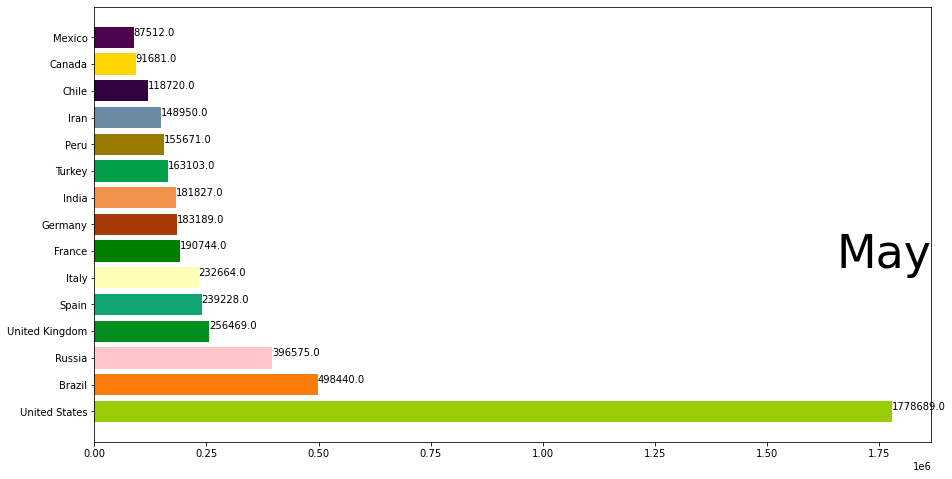

In [26]:
colors=dict(zip(countries,
                [choice(values_list)for x in countries]))

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   

ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])

for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'])):
    #ax.text(value, i,     name,            ha='right')  
    ax.text(value, i,     value,           ha='left',va='bottom')   

ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')

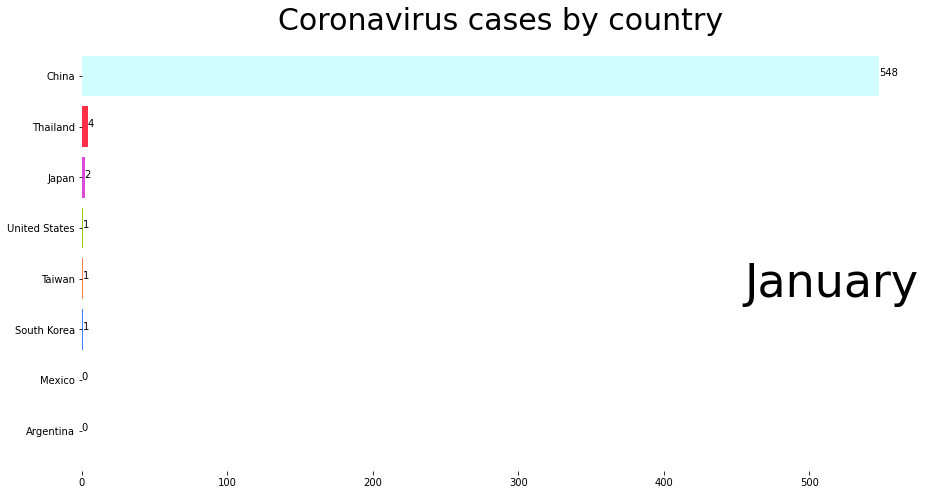

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchar(day):
    dff=(data2[data2.days.eq(day)].sort_values(by='total_cases', ascending=True).tail(10))
    ax.clear()
    ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
    
    for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'].astype(int))):
        #ax.text(value, i,     name,            ha='right')  
        ax.text(value, i,     value,           ha='left')   

    
    ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')
    #ax.text(1, 0.4, month, transform=ax.transAxes, size=46, ha='right')
    ax.set_title('Coronavirus cases by country', fontdict={'fontsize': 30})
    plt.box(False)
    
draw_barchar(21)

In [28]:
'''
fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))

HTML(animator.to_jshtml()) 
animator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)
animator.save('outputs/race.gif', writer='imagemagick')
'''

'\nfig, ax = plt.subplots(figsize=(15, 8))\n\nanimator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))\n\nHTML(animator.to_jshtml()) \nanimator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)\nanimator.save(\'outputs/race.gif\', writer=\'imagemagick\')\n'

In [29]:
data = data[~data["location"].str.contains("World")]
data = data[~data["location"].str.contains("International")]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60696,ZWE,Africa,Zimbabwe,2021-01-13,24256.0,1017.0,921.714,589.0,38.0,22.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60697,ZWE,Africa,Zimbabwe,2021-01-14,25368.0,1112.0,956.143,636.0,47.0,27.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60698,ZWE,Africa,Zimbabwe,2021-01-15,26109.0,741.0,921.286,666.0,30.0,28.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60699,ZWE,Africa,Zimbabwe,2021-01-16,26881.0,772.0,911.714,683.0,17.0,28.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [30]:
df_values, df_ranks = bcr.prepare_long_data(data, index='date', columns=['continent','location'],
                                            values='total_cases', steps_per_period=1)

df_values

continent     Africa                                                          \
location     Algeria   Angola   Benin Botswana Burkina Faso Burundi Cameroon   
(date, )                                                                       
2020-01-01       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-02       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-03       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-04       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-05       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
...              ...      ...     ...      ...          ...     ...      ...   
2021-01-14  103127.0  18613.0  3413.0  17365.0       8809.0  1103.0  27336.0   
2021-01-15  103381.0  18679.0  3413.0  17365.0       8882.0  1150.0  27336.0   
2021-01-16  103611.0  18765.0  3413.0  17365.0       9000.0  1185.0  28010.0   
2021-01-17  103833.0  18875.0  3413.0  17365.0       9188.0  1236.0  28010.0   
2021-01-18  103833.0  18875.0  3413.0  17365.0       9188.0  1236.0  28010.0   

continent                                               ... South America  \
location   Cape Verde Central African Republic    Chad  ...        Brazil   
(date, )                                                ...                 
2020-01-01        NaN                      NaN     NaN  ...           NaN   
2020-01-02        NaN                      NaN     NaN  ...           NaN   
2020-01-03        NaN                      NaN     NaN  ...           NaN   
2020-01-04        NaN                      NaN     NaN  ...           NaN   
2020-01-05        NaN                      NaN     NaN  ...           NaN   
...               ...                      ...     ...  ...           ...   
2021-01-14    12664.0                   4973.0  2773.0  ...     8324294.0   
2021-01-15    12776.0                   4973.0  2807.0  ...     8393492.0   
2021-01-16    12901.0                   4973.0  2855.0  ...     8455059.0   
2021-01-17    12993.0                   4973.0  2895.0  ...     8488099.0   
2021-01-18    12993.0                   4973.0  2895.0  ...     8488099.0   

continent                                                               \
location       Chile   Colombia   Ecuador  Guyana  Paraguay       Peru   
(date, )                                                                 
2020-01-01       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-02       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-03       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-04       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-05       NaN        NaN       NaN     NaN       NaN        NaN   
...              ...        ...       ...     ...       ...        ...   
2021-01-14  656712.0  1849101.0  226002.0  6745.0  119640.0  1040231.0   
2021-01-15  661180.0  1870179.0  226866.0  6805.0  120789.0  1056023.0   
2021-01-16  665493.0  1891034.0  230808.0  6851.0  121648.0  1056023.0   
2021-01-17  669832.0  1908413.0  231482.0  6908.0  122160.0  1060567.0   
2021-01-18  669832.0  1908413.0  231482.0  6908.0  122160.0  1060567.0   

continent                               
location   Suriname  Uruguay Venezuela  
(date, )                                
2020-01-01      NaN      NaN       NaN  
2020-01-02      NaN      NaN       NaN  
2020-01-03      NaN      NaN       NaN  
2020-01-04      NaN      NaN       NaN  
2020-01-05      NaN      NaN       NaN  
...             ...      ...       ...  
2021-01-14   7300.0  29989.0  118415.0  
2021-01-15   7409.0  30946.0  118856.0  
2021-01-16   7469.0  31669.0  119306.0  
2021-01-17   7527.0  32378.0  119803.0  
2021-01-18   7527.0  32378.0  119803.0  

[384 rows x 190 columns]

In [31]:
df_ranks

continent   Africa                                                      \
location   Algeria Angola Benin Botswana Burkina Faso Burundi Cameroon   
(date, )                                                                 
2020-01-01     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-02     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-03     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-04     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-05     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
...            ...    ...   ...      ...          ...     ...      ...   
2021-01-14   112.0   78.0  40.0     76.0         58.0    25.0     85.0   
2021-01-15   112.0   78.0  40.0     76.0         58.0    26.0     85.0   
2021-01-16   112.0   78.0  40.0     75.0         58.0    26.0     85.0   
2021-01-17   112.0   78.0  40.0     75.0         59.0    27.0     85.0   
2021-01-18   115.0   81.0  43.0     78.0         62.0    30.0     88.0   

continent                                             ... South America  \
location   Cape Verde Central African Republic  Chad  ...        Brazil   
(date, )                                              ...                 
2020-01-01        NaN                      NaN   NaN  ...           NaN   
2020-01-02        NaN                      NaN   NaN  ...           NaN   
2020-01-03        NaN                      NaN   NaN  ...           NaN   
2020-01-04        NaN                      NaN   NaN  ...           NaN   
2020-01-05        NaN                      NaN   NaN  ...           NaN   
...               ...                      ...   ...  ...           ...   
2021-01-14       67.0                     46.0  38.0  ...         188.0   
2021-01-15       67.0                     46.0  38.0  ...         188.0   
2021-01-16       67.0                     46.0  38.0  ...         188.0   
2021-01-17       67.0                     46.0  38.0  ...         188.0   
2021-01-18       70.0                     49.0  41.0  ...         188.0   

continent                                                                   \
location    Chile Colombia Ecuador Guyana Paraguay   Peru Suriname Uruguay   
(date, )                                                                     
2020-01-01    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-02    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-03    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-04    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-05    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
...           ...      ...     ...    ...      ...    ...      ...     ...   
2021-01-14  166.0    180.0   144.0   52.0    117.0  173.0     54.0    89.0   
2021-01-15  166.0    180.0   145.0   52.0    117.0  173.0     54.0    89.0   
2021-01-16  166.0    180.0   145.0   52.0    117.0  173.0     54.0    89.0   
2021-01-17  166.0    180.0   145.0   52.0    117.0  173.0     54.0    89.0   
2021-01-18  167.0    181.0   147.0   55.0    120.0  174.0     57.0    92.0   

continent             
location   Venezuela  
(date, )              
2020-01-01       NaN  
2020-01-02       NaN  
2020-01-03       NaN  
2020-01-04       NaN  
2020-01-05       NaN  
...              ...  
2021-01-14     116.0  
2021-01-15     116.0  
2021-01-16     116.0  
2021-01-17     116.0  
2021-01-18     119.0  

[384 rows x 190 columns]

In [32]:
df_values = df_values.fillna(0)
df_values["Europe"]
df = df_values["Europe"]
df.columns

Index(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
       'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom', 'Vatican'],
      dtype='object', name='location')

In [33]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=10,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/covid19_vert2.mp4')

CPU times: user 4min 24s, sys: 1min 53s, total: 6min 17s
Wall time: 2min 7s


In [34]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/race.gif')

CPU times: user 6min 1s, sys: 2min 37s, total: 8min 39s
Wall time: 8min


In [35]:
'''
import plotly.express as px

data = data.fillna(0)
fig = px.line(data, x="date", y="location", color='new_cases')
fig.show()
'''

'\nimport plotly.express as px\n\ndata = data.fillna(0)\nfig = px.line(data, x="date", y="location", color=\'new_cases\')\nfig.show()\n'

In [36]:
import ipywidgets as widgets



In [37]:
list(set(data.continent.values))

['Europe', 'Asia', 'Africa', 'North America', 'South America', 'Oceania']

In [38]:
continent = widgets.Select(
    options=['Europe', 'Oceania', 'Africa', 'Asia', 'North America', 'South America'],
    value='Europe',
    # rows=10,
    description='continent:',
    disabled=False
)

display(continent)

Select(description='continent:', options=('Europe', 'Oceania', 'Africa', 'Asia', 'North America', 'South Ameri…

In [39]:
continent.value

'Europe'

In [40]:
df_values2, df_ranks2 = bcr.prepare_long_data(data[data.continent==continent.value], index='date', columns=['continent','location'],
                                            values='total_cases', steps_per_period=1)

df_values2 = df_values2.fillna(0)
df_values2

continent    Europe                                        \
location    Albania Andorra   Austria   Belarus   Belgium   
(date, )                                                    
2020-01-24      0.0     0.0       0.0       0.0       0.0   
2020-01-25      0.0     0.0       0.0       0.0       0.0   
2020-01-26      0.0     0.0       0.0       0.0       0.0   
2020-01-27      0.0     0.0       0.0       0.0       0.0   
2020-01-28      0.0     0.0       0.0       0.0       0.0   
...             ...     ...       ...       ...       ...   
2021-01-14  65994.0  8868.0  389260.0  219663.0  672886.0   
2021-01-15  66635.0  8946.0  390788.0  221604.0  675089.0   
2021-01-16  67216.0  9038.0  392511.0  223537.0  677209.0   
2021-01-17  67690.0  9083.0  393778.0  225461.0  678839.0   
2021-01-18  67690.0  9083.0  393778.0  225461.0  678839.0   

continent                                                                 ...  \
location   Bosnia and Herzegovina  Bulgaria   Croatia   Cyprus   Czechia  ...   
(date, )                                                                  ...   
2020-01-24                    0.0       0.0       0.0      0.0       0.0  ...   
2020-01-25                    0.0       0.0       0.0      0.0       0.0  ...   
2020-01-26                    0.0       0.0       0.0      0.0       0.0  ...   
2020-01-27                    0.0       0.0       0.0      0.0       0.0  ...   
2020-01-28                    0.0       0.0       0.0      0.0       0.0  ...   
...                           ...       ...       ...      ...       ...  ...   
2021-01-14               117011.0  210951.0  223097.0  28124.0  866522.0  ...   
2021-01-15               117011.0  211503.0  223812.0  28609.0  874605.0  ...   
2021-01-16               117011.0  211736.0  224575.0  28811.0  883906.0  ...   
2021-01-17               117011.0  211813.0  224954.0  28968.0  889159.0  ...   
2021-01-18               117011.0  211813.0  224954.0  28968.0  889159.0  ...   

continent                                                                 \
location   San Marino    Serbia  Slovakia  Slovenia      Spain    Sweden   
(date, )                                                                   
2020-01-24        0.0       0.0       0.0       0.0        0.0       0.0   
2020-01-25        0.0       0.0       0.0       0.0        0.0       0.0   
2020-01-26        0.0       0.0       0.0       0.0        0.0       0.0   
2020-01-27        0.0       0.0       0.0       0.0        0.0       0.0   
2020-01-28        0.0       0.0       0.0       0.0        0.0       0.0   
...               ...       ...       ...       ...        ...       ...   
2021-01-14     2737.0  368072.0  217978.0  145472.0  2211967.0  518783.0   
2021-01-15     2767.0  369823.0  220707.0  147016.0  2252164.0  523486.0   
2021-01-16     2778.0  371216.0  222752.0  148556.0  2252164.0  523486.0   
2021-01-17     2778.0  372533.0  223325.0  149125.0  2252164.0  523486.0   
2021-01-18     2778.0  372533.0       0.0  149125.0  2252164.0  523486.0   

continent                                                 
location   Switzerland    Ukraine United Kingdom Vatican  
(date, )                                                  
2020-01-24         0.0        0.0            0.0     0.0  
2020-01-25         0.0        0.0            0.0     0.0  
2020-01-26         0.0        0.0            0.0     0.0  
2020-01-27         0.0        0.0            0.0     0.0  
2020-01-28         0.0        0.0            0.0     0.0  
...                ...        ...            ...     ...  
2021-01-14    492832.0  1175343.0      3269757.0    27.0  
2021-01-15    495228.0  1183963.0      3325642.0    27.0  
2021-01-16    495228.0  1192114.0      3367070.0    27.0  
2021-01-17    495228.0  1198512.0      3405740.0    27.0  
2021-01-18    495228.0  1198512.0      3405740.0    27.0  

[361 rows x 46 columns]

In [43]:
%%time
bcr.bar_chart_race(df=df_values2, n_bars=15,fixed_max=False,figsize=(5, 3),title=f'COVID-19 cases by Country in {continent.value}',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/racecountry.gif')

CPU times: user 5min 20s, sys: 2min 20s, total: 7min 41s
Wall time: 6min 32s
